In [2]:
import pandas as pd

from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model, Sequential
import keras.backend as K

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# the csv file is under the week 2 content
filename = 'C:/MSDS/Deep/wk1/diabetes.csv'
heart_df = pd.read_csv(filename)
heart_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
heart_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
feat_cols = [c for c in heart_df.columns if c != 'Outcome']
# select features and columns from the dataframe as we did in the neural net exercise
features = heart_df[feat_cols].values
targets = heart_df['Outcome'].values
#targets = to_categorical(targets)
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    targets,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=None)

In [7]:
print(features.shape,
targets.shape)

(768, 8) (768,)


K.clear_session()
model = Sequential()
model.add(Dense(32, input_dim=(features.shape[1],))
model.add(Dense(200, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

#model = Sequential(inputs, predictions)
# choose an optimizer and use the correct loss for binary classification
#model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [75]:

#From keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
K.clear_session()
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(8, activation='relu', input_dim=8)) #64 neurons
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          epochs=20)
score = model.evaluate(x_test, y_test)

Epoch 1/20
614/614 [==============================] - 0s 720us/step - loss: 5.5915 - acc: 0.6531
Epoch 2/20
614/614 [==============================] - 0s 77us/step - loss: 5.5915 - acc: 0.6531
Epoch 3/20
614/614 [==============================] - 0s 60us/step - loss: 5.5915 - acc: 0.6531
Epoch 4/20
614/614 [==============================] - 0s 66us/step - loss: 5.5915 - acc: 0.6531
Epoch 5/20
614/614 [==============================] - 0s 72us/step - loss: 5.5915 - acc: 0.6531
Epoch 6/20
614/614 [==============================] - 0s 67us/step - loss: 5.5915 - acc: 0.6531
Epoch 7/20
614/614 [==============================] - 0s 77us/step - loss: 5.5915 - acc: 0.6531
Epoch 8/20
614/614 [==============================] - 0s 75us/step - loss: 5.5915 - acc: 0.6531
Epoch 9/20
614/614 [==============================] - 0s 74us/step - loss: 5.5915 - acc: 0.6531
Epoch 10/20
614/614 [==============================] - 0s 65us/step - loss: 5.5915 - acc: 0.6531
Epoch 11/20
614/614 [=================

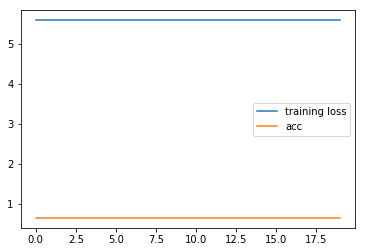

In [76]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.show()

In [77]:
model.evaluate(X_train, y_train)

614/614 [==============================] - 0s 42us/step


[5.5914566198467046, 0.6530944627348686]

In [78]:
model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 58us/step


[5.7564625801978178, 0.64285714208305655]

In [52]:
?model.evaluate
